# <center> Lab 0 Examples 
## <center>    Calculus 1 Review
    
This Lab should be used in addition to tutorial 2. Students who didn't use Jupyter in Calculus 1, should do both Tutorial 2 and this Lab. Students who have done Jupyter labs in the past should do this Lab, but are encoranged to review Tutorial 2 as well. It is also encouraged to share all Examples Labs from Calculus 1 with students.

**Video**: https://youtu.be/T-peF8uOzIA
    

We start with importing all needed libraries. We will use NumPy, SymPy and Matlplotlib. We will also add a variable for SymPy.

In [12]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from numpy.polynomial import *


sp.var('x')

x

#### Example 1 - Limits and lambdify

Let $f(x)=\frac{sin(x-2)}{x-2}$. Let's find the limit at $x=2$ and let's plot the graph.

Note: we can find `limit` using command that is in SymPy, but ploting SymPy functions is tricky. To plot, it is easier to use NumPy function. Command `lambdify` allows us to convert from SymPy to NumPy.

In [13]:
f=(sp.sin(x-2))/(x-2)
L=sp.limit(f, x, 2, '+-')  # +-  means it is two sided limit. One sided limits, you can use either just + or just -
print("Limit at x=2 is ", L)

Limit at x=2 is  1


Now the graph:

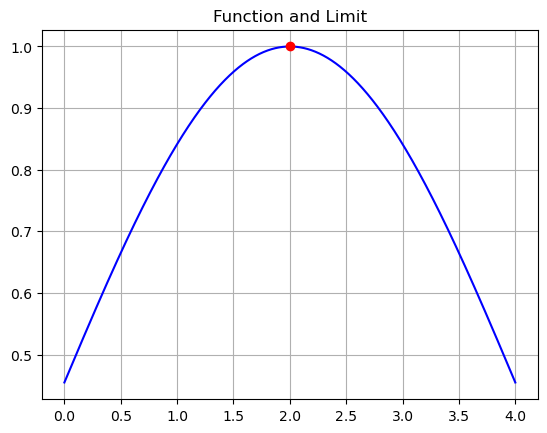

In [14]:
fn=sp.lambdify(x,f,'numpy')

xval=np.linspace(0,4,1000)

fig=plt.figure()

plt.plot(xval,fn(xval), color='blue',label="Function")
plt.plot(2,L, marker="o", color='red')         # marker allows us to highligh individual points.
plt.grid()

plt.title("Function and Limit")

plt.show()

**Note:** If we need to find limit at infinity we can use `sp.oo` for $\infty$, and `-sp.oo` for $-\infty$:

In [15]:
sp.limit(f,x,sp.oo)

0

#### Example 2 - Derivatives, Solve and Evaluation
 
We can use SymPy to find derivatives as well.

Let $f(x)=\frac{e^x}{x^2-1}$. Let's find critical points.

First thing we need to do is to find derivative:

In [16]:
f=(sp.exp(x))/(x**2-1)
fd=f.diff(x)
fd

-2*x*exp(x)/(x**2 - 1)**2 + exp(x)/(x**2 - 1)

Now we need to find critical points by equating the derivative to zero and solving an equation. There are multiple ways to solve equation: `sp.solveset`, `sp.solve`, `sp.nsolve`, etc. First one is generally the best, but sometimes solutions are harder to read; the second command is outdated version of `solveset`, but sometimes solutions are easier to read; finally, last commands will estimate only one of the solution. You shouldn't really use `nsolve` unless first two commands can't find solutions because equation is too difficult. Another helpful commands here is `sp.N`. It will convert solutions into decimal form, making them easier to read or compare.

In [17]:
sp.solveset(fd,x)

{1 - sqrt(2), 1 + sqrt(2)}

Those are precise solution. If we need to see decimal form:

In [18]:
sp.N(sp.solveset(fd,x))

{-0.414213562373095, 2.41421356237309}

What about second derivative?

In [19]:
f.diff(x,2)

(-4*x/(x**2 - 1) + 1 + 2*(4*x**2/(x**2 - 1) - 1)/(x**2 - 1))*exp(x)/(x**2 - 1)

We can also evaluate our functions at any value. There are few ways of doing it. If you have the NumPy type function, it is pretty straighforward. You just write they way you would write on paper. If it is SymPy, you can use `.subs()`. For example, let's evaluate $f(x)$ at one of the critical points.

In SymPy:

In [20]:
f.subs(x,1-sp.sqrt(2))

exp(1 - sqrt(2))/(-1 + (1 - sqrt(2))**2)

In [21]:
sp.N(f.subs(x,1-sp.sqrt(2)))

-0.797728347691777

In NumPy:

In [22]:
fn=sp.lambdify(x,f)

fn(1-np.sqrt(2))

-0.797728347691777

#### Example 3 - Integration

SymPy allows us to integrate as well using `sp.integrate`.

Let's find $\int (\sin(x)-x) dx$ and $\int_0^1 (\sin(x)-x) dx$

In [23]:
f=sp.sin(x)-x
sp.integrate(f,x)

-x**2/2 - cos(x)

As you can see, "+C" is not being shown.

Now the definite integral:

In [24]:
sp.integrate(f,(x,0,1))

1/2 - cos(1)

In [25]:
sp.N(sp.integrate(f,(x,0,1)))

-0.0403023058681397

#### Example 4 - Polynomials and Models

The stopping distance $T$ of an automobile, on dry, level pavement, traveling at the speed $v$ (in kilometers per hour) is the distance $R$ (in meters) the car travels during the reaction time of the driver plus the distance $B$ (in meters) the car travels after the breaks are applied. The table below shows the results of an experiment
$$
\begin{aligned}
\begin{array}{|c|c|c|c|c|c|}
\hline \hline 
v & 20 & 40 & 60 & 80 &100 \\
\hline 
R & 8.3 & 16.7 & 25.0 & 33.3 & 41.7\\
\hline
B & 2.3 & 9.0 & 20.2 & 35.8 & 55.9\\
\hline
\end{array}
\end{aligned}
$$

The goal of this problem is to find a linear model for $R$ and quadratic model for $B$, then find $T$ and few other things about $T$.


To start, let's create 3 arrays with our values:

In [26]:
v=[20,40,60,80,100]
R=[8.3,16.7, 25.0,33.3,41.7]
B=[2.3,9.0,20.2,35.8,55.9]

Next, we will use NumPy to create a linear model for R and quadratic one for B. 

NumPy has a sublibrary `polynomial` that can do a lot of nice things with polynomials. To avoid writing `np.polynomial.Polynomial` all the time you should add this sublibrary separatelly. In this Lab, we have already added it right away with all its own other sublibraries.

In [27]:
xval=np.linspace(0,100,1000)   # we are avoiding using v or x here, because we have other uses for those.

# Next two commands create the models. Which in reality are just coefficients of your polynomial model.
Rmodel=polynomial.polyfit(v,R,1) # 1 at the end is the degree of the model. Here it is 1, so it is linear.
Bmodel=polynomial.polyfit(v,B,2)

# Next two commands evaluate your models at xval. This is useful for plotting.
Rfit=polynomial.polyval(xval,Rmodel)
Bfit=polynomial.polyval(xval,Bmodel)

Lets plot each one of them together with the actual data to see how well they fit. We will use a new commands `scatter` to plot individual points:

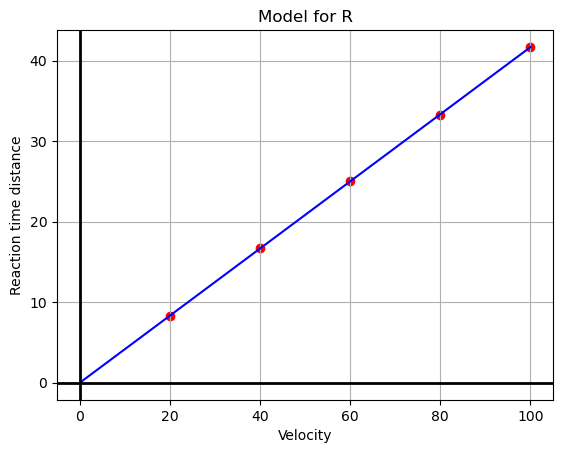

In [28]:
fig=plt.figure()

plt.scatter(v,R, color='red')
plt.plot(xval,Rfit, color= 'blue')

plt.title("Model for R")
plt.xlabel('Velocity')
plt.ylabel('Reaction time distance')
plt.grid()

plt.axhline(0, color='black', lw=2)  # horizontal line to create horizontal axis
plt.axvline(0, color='black', lw=2)  # vertical line to create vertical axis

plt.show()

Let's look at Rmodel and Bmodel. Recall, they both contain coefficients of corresponding polynomial models:

In [29]:
print("Coef of B Model = ", Bmodel)
print("Coef of R Model = ", Rmodel)

Coef of B Model =  [0.04       0.00142857 0.00557143]
Coef of R Model =  [-0.02   0.417]


Let's create our polynomial functions and add them to get model for T. We can use `Polynomial` command that will take the coefficients and make a polynomial out of them.

In [30]:
Bpoly=Polynomial(Bmodel)
Rpoly=Polynomial(Rmodel)

Tpoly=Bpoly+Rpoly
Tpoly

Polynomial([0.02      , 0.41842857, 0.00557143], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Now, let's find derivative of $T$. We will continue here to use Polynomial library instead of SymPy

In [31]:
Td=Tpoly.deriv()
Td

Polynomial([0.41842857, 0.01114286], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Now the critical points.

In [32]:
Polynomial.roots(Td)

array([-37.55128205])

Second derivative of $T$:

In [33]:
Td2=Tpoly.deriv(2)
Td2

Polynomial([0.01114286], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Now let's find the integral of $T$:

In [34]:
antid=Tpoly.integ()
antid

Polynomial([0.        , 0.02      , 0.20921429, 0.00185714], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Let's evaluate it between $v=0$ and $v=100$:

In [35]:
antid(100)-antid(0)

3951.2857142857138

#### Final notes

If you want to see how to do implicit differentiation, you should look through Lab 3 Examples from Calculus 1.